In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chatterjeeankita
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000


100%|██████████| 5.20G/5.20G [01:12<00:00, 76.9MB/s]


In [ ]:
import pandas as pd

# Replace 'path/to/your/csvfile.csv' with the actual path to your CSV file
csv_file_path = '/content/skin-cancer-mnist-ham10000/HAM10000_metadata.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
import os
import shutil

# List of source directories to be merged
source_dirs = [
    '/content/skin-cancer-mnist-ham10000/HAM10000_images_part_1',
    '/content/skin-cancer-mnist-ham10000/HAM10000_images_part_2',
    '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1'
    '/content/skin-cancer-mnist-ham10000/ham10000_images_part_2'
    # Add more directories as needed
]

# Define the destination directory
destination_dir = 'ALL_HAM_DATA'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Function to merge multiple folders into one
def merge_folders(source_dirs, destination_dir):
    for source_dir in source_dirs:
        for root, _, files in os.walk(source_dir):
            for file in files:
                src_path = os.path.join(root, file)
                dst_path = os.path.join(destination_dir, file)

                if os.path.exists(dst_path):
                    print(f"File {dst_path} already exists and will be overwritten")

                shutil.copy(src_path, dst_path)  # use shutil.move() if you want to move instead of copy

# Merge the folders
merge_folders(source_dirs, destination_dir)

print("Folders have been successfully merged into:", destination_dir)

Folders have been successfully merged into: ALL_HAM_DATA


In [ ]:
import os
import pandas as pd
import shutil

# Load the DataFrame from CSV
csv_file_path = '/content/skin-cancer-mnist-ham10000/HAM10000_metadata.csv'  # replace with your CSV file path
df = pd.read_csv(csv_file_path)

# Define the dictionary for lesion types
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Define the directory where images are currently stored
image_source_dir = '/content/ALL_HAM_DATA'  # replace with your images directory path

# Create a directory to store the classified images
classified_image_dir = 'new_ham_dataset'  # replace with your desired path
if not os.path.exists(classified_image_dir):
    os.makedirs(classified_image_dir)

# Create folders for each lesion type
for lesion in lesion_type_dict.values():
    lesion_folder = os.path.join(classified_image_dir, lesion)
    if not os.path.exists(lesion_folder):
        os.makedirs(lesion_folder)

# Function to move images to corresponding folders
def move_images_to_class_folders(df, source_dir, target_dir):
    for _, row in df.iterrows():
        image_id = row['image_id']
        lesion_class = row['dx']

        if lesion_class in lesion_type_dict:
            lesion_folder = lesion_type_dict[lesion_class]
            src_path = os.path.join(source_dir, f"{image_id}.jpg")  # assuming images are in .jpg format
            dst_path = os.path.join(target_dir, lesion_folder, f"{image_id}.jpg")

            if os.path.exists(src_path):
                shutil.copy(src_path, dst_path)  # use shutil.move() if you want to move instead of copy
            else:
                print(f"Image {src_path} does not exist")

# Move images to corresponding class folders
move_images_to_class_folders(df, image_source_dir, classified_image_dir)

In [ ]:
!pip -q install split-folders[full]

In [ ]:
import splitfolders

# Split with a ratio to only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/new_ham_dataset", output="split_ham_dataset",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 10015 files [00:20, 481.00 files/s]


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt') # load a pretrained model (recommended for training)

# Train the model
model.train(data='/content/split_ham_dataset', epochs=10)

100%|██████████| 5.31M/5.31M [00:00<00:00, 61.8MB/s]


Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/split_ham_dataset, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/split_ham_dataset/train... 8010 images, 0 corrupt: 100%|██████████| 8010/8010 [00:23<00:00, 338.72it/s]


train: New cache created: /content/split_ham_dataset/train.cache


val: Scanning /content/split_ham_dataset/val... 998 images, 0 corrupt: 100%|██████████| 998/998 [00:02<00:00, 348.96it/s]

val: New cache created: /content/split_ham_dataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10         0G      2.015         16        224:   0%|          | 1/501 [00:01<11:53,  1.43s/it]


100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:37<00:00,  1.17s/it]

                   all      0.747      0.991



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:41<00:00,  1.31s/it]

                   all      0.789      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:43<00:00,  1.37s/it]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:37<00:00,  1.18s/it]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:36<00:00,  1.15s/it]

                   all      0.822      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:42<00:00,  1.32s/it]

                   all      0.829      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:35<00:00,  1.12s/it]

                   all      0.849      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:35<00:00,  1.10s/it]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:36<00:00,  1.15s/it]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10         0G     0.4242         10        224: 100%|██████████| 501/501 [10:40<00:00,  1.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:41<00:00,  1.30s/it]

                   all      0.856      0.999



10 epochs completed in 1.911 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,443,847 parameters, 0 gradients, 3.3 GFLOPs
train: /content/split_ham_dataset/train... found 8010 images in 7 classes ✅ 
val: /content/split_ham_dataset/val... found 998 images in 7 classes ✅ 
test: /content/split_ham_dataset/test... found 1007 images in 7 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:35<00:00,  1.12s/it]


                   all      0.856      0.999
Speed: 0.0ms preprocess, 16.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c91d683c790>
curves: []
curves_results: []
fitness: 0.9273546934127808
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8557114005088806, 'metrics/accuracy_top5': 0.9989979863166809, 'fitness': 0.9273546934127808}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0010090982746743487, 'inference': 16.533318167936827, 'loss': 0.00013832099929840148, 'postprocess': 0.0001072644709585186}
task: 'classify'
top1: 0.8557114005088806
top5: 0.9989979863166809

In [ ]:
!zip -r /content/skin_cancer.zip /content/runs/classify

  adding: content/runs/classify/ (stored 0%)
  adding: content/runs/classify/train/ (stored 0%)
  adding: content/runs/classify/train/train_batch2.jpg (deflated 5%)
  adding: content/runs/classify/train/events.out.tfevents.1721372707.91effcf9b0f1.278.0 (deflated 93%)
  adding: content/runs/classify/train/train_batch0.jpg (deflated 4%)
  adding: content/runs/classify/train/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/classify/train/val_batch1_labels.jpg (deflated 5%)
  adding: content/runs/classify/train/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/classify/train/results.csv (deflated 83%)
  adding: content/runs/classify/train/results.png (deflated 8%)
  adding: content/runs/classify/train/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/classify/train/confusion_matrix.png (deflated 22%)
  adding: content/runs/classify/train/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/classify/train/train_batch1.jpg (deflated 5%)
  adding: content/runs/clas

In [ ]:
metrics = model.val() # no arguments needed, dataset and settings remembered
metrics.top1 # top1 accuracy
metrics.top5 # top5 accuracy

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,443,847 parameters, 0 gradients, 3.3 GFLOPs
train: /content/split_ham_dataset/train... found 8010 images in 7 classes ✅ 
val: /content/split_ham_dataset/val... found 998 images in 7 classes ✅ 
test: /content/split_ham_dataset/test... found 1007 images in 7 classes ✅ 


val: Scanning /content/split_ham_dataset/val... 998 images, 0 corrupt: 100%|██████████| 998/998 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:33<00:00,  1.89it/s]


                   all      0.856      0.999
Speed: 0.0ms preprocess, 14.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


0.9989979863166809

In [ ]:
results = model.predict("/content/split_ham_dataset/test/Vascular lesions/ISIC_0025452.jpg")
probs = results[0].probs # Access the Probs object of the first (and only) result

print(probs.data)


image 1/1 /content/split_ham_dataset/test/Vascular lesions/ISIC_0025452.jpg: 224x224 Vascular lesions 1.00, Melanocytic nevi 0.00, Melanoma 0.00, Benign keratosis-like lesions 0.00, Basal cell carcinoma 0.00, 20.8ms
Speed: 120.0ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
tensor([7.9967e-11, 5.2851e-08, 2.5890e-07, 5.1343e-08, 6.9684e-04, 4.7036e-07, 9.9930e-01])


In [ ]:
%matplotlib inline
# python libraties
import os, cv2,itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob
from PIL import Image

# pytorch libraries
import torch
from torch import optim,nn
from torch.autograd import Variable
from torch.utils.data import DataLoader,Dataset
from torchvision import models,transforms

# sklearn libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ensure results are reproducible
np.random.seed(10)
torch.manual_seed(10)
torch.cuda.manual_seed(10)

#print(os.listdir("../input"))
print(os.listdir('/content/skin-cancer-mnist-ham10000'))

['HAM10000_images_part_2', 'ham10000_images_part_2', 'HAM10000_metadata.csv', 'hmnist_8_8_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_RGB.csv', 'HAM10000_images_part_1', 'ham10000_images_part_1', 'hmnist_28_28_L.csv']


In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
data_dir = '/content/skin-cancer-mnist-ham10000'
all_image_path = glob(os.path.join(data_dir, '*', '*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
def compute_img_mean_std(image_paths):
    """
        computing the mean and std of three channel on the whole dataset,
        first we should normalize the image from 0-255 to 0-1
    """

    img_h, img_w = 224, 224
    imgs = []
    means, stdevs = [], []

    for i in tqdm(range(len(image_paths))):
        img = cv2.imread(image_paths[i])
        img = cv2.resize(img, (img_h, img_w))
        imgs.append(img)

    imgs = np.stack(imgs, axis=3)
    print(imgs.shape)

    imgs = imgs.astype(np.float32) / 255.

    for i in range(3):
        pixels = imgs[:, :, i, :].ravel()  # resize to one row
        means.append(np.mean(pixels))
        stdevs.append(np.std(pixels))

    means.reverse()  # BGR --> RGB
    stdevs.reverse()

    print("normMean = {}".format(means))
    print("normStd = {}".format(stdevs))
    return means,stdevs

In [ ]:
# Values stored to save future run time
norm_mean = [0.7630392, 0.5456477, 0.57004845]
norm_std = [0.1409286, 0.15261266, 0.16997074]

In [ ]:
df_original = pd.read_csv(os.path.join(data_dir, 'HAM10000_metadata.csv'))
df_original['path'] = df_original['image_id'].map(imageid_path_dict.get)
df_original['cell_type'] = df_original['dx'].map(lesion_type_dict.get)
df_original['cell_type_idx'] = pd.Categorical(df_original['cell_type']).codes
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2


In [ ]:
# Determine how many images are associated with each lesion_id
df_undup = df_original.groupby('lesion_id').count()
# Filter out lesion_id's that have only one image associated with it
df_undup = df_undup[df_undup['image_id'] == 1]
df_undup.reset_index(inplace=True)
df_undup.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000001,1,1,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1,1,1


In [ ]:
# Identify lesion_id's that have duplicate images and those that have only one image.
def get_duplicates(x):
    unique_list = list(df_undup['lesion_id'])
    if x in unique_list:
        return 'unduplicated'
    else:
        return 'duplicated'

# Create a new colum that is a copy of the lesion_id column
df_original['duplicates'] = df_original['lesion_id']
# Apply the function to this new column
df_original['duplicates'] = df_original['duplicates'].apply(get_duplicates)
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2,duplicated
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2,duplicated
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2,duplicated
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2,duplicated
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2,duplicated


In [ ]:
df_original['duplicates'].value_counts()

duplicates
unduplicated    5514
duplicated      4501
Name: count, dtype: int64

In [ ]:
# Filter out images that don't have duplicates
df_undup = df_original[df_original['duplicates'] == 'unduplicated']
df_undup.shape

(5514, 11)

In [ ]:
# Create a val set using df as none of these images have augmented duplicates in the train set
y = df_undup['cell_type_idx']
_, df_val = train_test_split(df_undup, test_size=0.2, random_state=101, stratify=y)
df_val.shape

(1103, 11)

In [ ]:
df_val['cell_type_idx'].value_counts()

cell_type_idx
4    883
2     88
6     46
1     35
0     30
5     13
3      8
Name: count, dtype: int64

In [ ]:
# This set will be df_original excluding all rows that are in the val set
# This function identifies if an image is part of the train or val set.
def get_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# Identify train and val rows
# Create a new colum that is a copy of the image_id column
df_original['train_or_val'] = df_original['image_id']
# Apply the function to this new column
df_original['train_or_val'] = df_original['train_or_val'].apply(get_val_rows)
# Filter out training rows
df_train = df_original[df_original['train_or_val'] == 'train']
print(len(df_train))
print(len(df_val))

8912
1103


In [ ]:
df_train['cell_type'].value_counts()

cell_type
Melanocytic nevi                  5822
dermatofibroma                    1067
Benign keratosis-like lesions     1011
Basal cell carcinoma               479
Actinic keratoses                  297
Vascular lesions                   129
Dermatofibroma                     107
Name: count, dtype: int64

In [ ]:
df_val['cell_type'].value_counts()

cell_type
Melanocytic nevi                  883
Benign keratosis-like lesions      88
dermatofibroma                     46
Basal cell carcinoma               35
Actinic keratoses                  30
Vascular lesions                   13
Dermatofibroma                      8
Name: count, dtype: int64

In [ ]:
data_aug_rate = [15,10,5,50,0,40,5]
for i in range(7):
    if data_aug_rate[i]:
        df_train = pd.concat([df_train, pd.concat([df_train.loc[df_train['cell_type_idx'] == i,:]]*(data_aug_rate[i]-1), ignore_index=True)], ignore_index=True) # Use pd.concat instead of .append
df_train['cell_type'].value_counts()

cell_type
Melanocytic nevi                  5822
Dermatofibroma                    5350
dermatofibroma                    5335
Vascular lesions                  5160
Benign keratosis-like lesions     5055
Basal cell carcinoma              4790
Actinic keratoses                 4455
Name: count, dtype: int64

In [ ]:
# Split the test set again in a validation set and a true test set:
df_val, df_test = train_test_split(df_val, test_size=0.5)
df_train = df_train.reset_index()
df_val = df_val.reset_index()
df_test = df_test.reset_index()

In [ ]:
print(len(df_test))
df_test['cell_type'].value_counts()

552


cell_type
Melanocytic nevi                  444
Benign keratosis-like lesions      47
dermatofibroma                     20
Basal cell carcinoma               15
Actinic keratoses                  12
Vascular lesions                    8
Dermatofibroma                      6
Name: count, dtype: int64

In [ ]:
# feature_extract is a boolean that defines finetuning or feature extracting.
# If feature_extract = False, the model is finetuned and all model parameters are updated.
# If feature_extract = True, only the last layer parameters are updated, the others remain fixed.
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18, resnet34, resnet50, resnet101
        """
        model_ft = models.resnet50(pretrained=True)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "mobilenet":
        model_ft = models.mobilenet_v2(pretrained=True, progress=True)
        set_parameter_requires_grad(model_ft, feature_extract)
        input_size = 224

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
model_name = "mobilenet"
num_classes = 7
feature_extract = False
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)
# Define the device:
USE_GPU = True
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Using device: cuda')
else:
    print("Using device: cpu")
#device = torch.device('cuda:0')
# device = torch.device('cpu')
# Put the model on the device:
model = model_ft.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 199MB/s]


Using device: cuda


In [ ]:
# define the transformation of the train images.
train_transform = transforms.Compose([transforms.Resize((input_size,input_size)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomVerticalFlip(),
                                      transforms.RandomRotation(20),
                                      transforms.ColorJitter(brightness=0.1, contrast=0.1, hue=0.1),
                                        transforms.ToTensor(),
                                      transforms.Normalize(norm_mean, norm_std)])

# define the transformation of the val images.
val_transform = transforms.Compose([transforms.Resize((input_size,input_size)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(norm_mean, norm_std)])

# define the transformation of the test images.
test_transform = transforms.Compose([transforms.Resize((input_size,input_size)),
                                     transforms.ToTensor(),
                                    transforms.Normalize(norm_mean, norm_std)])

In [ ]:
# Define a pytorch dataloader for this dataset
class HAM10000(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # Load data and get label
        X = Image.open(self.df['path'][index])
        y = torch.tensor(int(self.df['cell_type_idx'][index]))

        if self.transform:
            X = self.transform(X)

        return X, y

In [ ]:
# Define the training set using the table train_df and using the defined transitions (train_transform)
training_set = HAM10000(df_train, transform=train_transform)
train_loader = DataLoader(training_set, batch_size=32, shuffle=True, num_workers=4)

# Same for the validation set:
validation_set = HAM10000(df_val, transform=train_transform)
val_loader = DataLoader(validation_set, batch_size=32, shuffle=False, num_workers=4)

# Same for the test set:
test_set = HAM10000(df_test, transform=train_transform)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Set optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss().to(device)

In [ ]:
# This function is used during training process, to calculate the loss and accuracy
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
total_loss_train, total_acc_train = [],[]
def train(train_loader, model, criterion, optimizer, epoch):
    model.train()
    train_loss = AverageMeter()
    train_acc = AverageMeter()
    curr_iter = (epoch - 1) * len(train_loader)
    for i, data in enumerate(train_loader):
        images, labels = data
        N = images.size(0)
        images = Variable(images).to(device)
        labels = Variable(labels).to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        prediction = outputs.max(1, keepdim=True)[1]
        train_acc.update(prediction.eq(labels.view_as(prediction)).sum().item()/N)
        train_loss.update(loss.item())
        curr_iter += 1
        if (i + 1) % 100 == 0:
            print('[epoch %d], [iter %d / %d], [train loss %.5f], [train acc %.5f]' % (
                epoch, i + 1, len(train_loader), train_loss.avg, train_acc.avg))
            total_loss_train.append(train_loss.avg)
            total_acc_train.append(train_acc.avg)
    return train_loss.avg, train_acc.avg

In [ ]:
def validate(val_loader, model, criterion, optimizer, epoch):
    model.eval()
    val_loss = AverageMeter()
    val_acc = AverageMeter()
    with torch.no_grad():
        for i, data in tqdm(enumerate(val_loader)):
            images, labels = data
            N = images.size(0)
            images = Variable(images).to(device)
            labels = Variable(labels).to(device)

            outputs = model(images)
            prediction = outputs.max(1, keepdim=True)[1]

            val_acc.update(prediction.eq(labels.view_as(prediction)).sum().item()/N)

            val_loss.update(criterion(outputs, labels).item())

    print('------------------------------------------------------------')
    print('[epoch %d], [val loss %.5f], [val acc %.5f]' % (epoch, val_loss.avg, val_acc.avg))
    print('------------------------------------------------------------')
    return val_loss.avg, val_acc.avg

In [ ]:
epoch_num = 10
best_val_acc = 0
total_loss_val, total_acc_val = [],[]
for epoch in tqdm(range(1, epoch_num+1)):
    loss_train, acc_train = train(train_loader, model, criterion, optimizer, epoch)
    loss_val, acc_val = validate(val_loader, model, criterion, optimizer, epoch)
    total_loss_val.append(loss_val)
    total_acc_val.append(acc_val)
    if acc_val > best_val_acc:
        best_val_acc = acc_val
        print('*****************************************************')
        print('best record: [epoch %d], [val loss %.5f], [val acc %.5f]' % (epoch, loss_val, acc_val))
        print('*****************************************************')

  0%|          | 0/10 [00:00<?, ?it/s]

[epoch 1], [iter 100 / 1124], [train loss 1.64200], [train acc 0.51313]
[epoch 1], [iter 200 / 1124], [train loss 1.30365], [train acc 0.58391]
[epoch 1], [iter 300 / 1124], [train loss 1.14405], [train acc 0.62375]
[epoch 1], [iter 400 / 1124], [train loss 1.05661], [train acc 0.64430]
[epoch 1], [iter 500 / 1124], [train loss 0.99014], [train acc 0.66156]
[epoch 1], [iter 600 / 1124], [train loss 0.94529], [train acc 0.67318]
[epoch 1], [iter 700 / 1124], [train loss 0.90647], [train acc 0.68527]
[epoch 1], [iter 800 / 1124], [train loss 0.87679], [train acc 0.69344]
[epoch 1], [iter 900 / 1124], [train loss 0.84858], [train acc 0.70184]
[epoch 1], [iter 1000 / 1124], [train loss 0.82337], [train acc 0.70950]
[epoch 1], [iter 1100 / 1124], [train loss 0.80352], [train acc 0.71543]



0it [00:00, ?it/s]
1it [00:01,  1.54s/it]
3it [00:01,  2.17it/s]
5it [00:03,  1.79it/s]
7it [00:03,  2.83it/s]
9it [00:04,  2.06it/s]
10it [00:04,  2.39it/s]
11it [00:04,  2.79it/s]
12it [00:05,  3.09it/s]
13it [00:06,  1.48it/s]
14it [00:06,  1.83it/s]
15it [00:07,  2.32it/s]
17it [00:07,  2.51it/s]
18it [00:08,  2.22it/s]
 10%|█         | 1/10 [09:09<1:22:25, 549.52s/it]

------------------------------------------------------------
[epoch 1], [val loss 0.41737], [val acc 0.83507]
------------------------------------------------------------
*****************************************************
best record: [epoch 1], [val loss 0.41737], [val acc 0.83507]
*****************************************************
[epoch 2], [iter 100 / 1124], [train loss 0.56981], [train acc 0.79031]
[epoch 2], [iter 200 / 1124], [train loss 0.56529], [train acc 0.79375]
[epoch 2], [iter 300 / 1124], [train loss 0.56153], [train acc 0.79469]
[epoch 2], [iter 400 / 1124], [train loss 0.55176], [train acc 0.79711]
[epoch 2], [iter 500 / 1124], [train loss 0.54665], [train acc 0.79806]
[epoch 2], [iter 600 / 1124], [train loss 0.53997], [train acc 0.79984]
[epoch 2], [iter 700 / 1124], [train loss 0.53757], [train acc 0.79978]
[epoch 2], [iter 800 / 1124], [train loss 0.53472], [train acc 0.80121]
[epoch 2], [iter 900 / 1124], [train loss 0.53089], [train acc 0.80288]
[epoch 2], 


0it [00:00, ?it/s]
1it [00:02,  2.67s/it]
3it [00:02,  1.32it/s]
5it [00:05,  1.04it/s]
6it [00:05,  1.37it/s]
7it [00:05,  1.74it/s]
8it [00:05,  2.27it/s]
9it [00:07,  1.07it/s]
10it [00:07,  1.42it/s]
11it [00:07,  1.87it/s]
13it [00:09,  1.54it/s]
14it [00:09,  1.89it/s]
16it [00:09,  2.94it/s]
18it [00:10,  1.76it/s]
 20%|██        | 2/10 [18:11<1:12:42, 545.31s/it]

------------------------------------------------------------
[epoch 2], [val loss 0.37313], [val acc 0.85764]
------------------------------------------------------------
*****************************************************
best record: [epoch 2], [val loss 0.37313], [val acc 0.85764]
*****************************************************
[epoch 3], [iter 100 / 1124], [train loss 0.47441], [train acc 0.82812]
[epoch 3], [iter 200 / 1124], [train loss 0.48114], [train acc 0.82297]
[epoch 3], [iter 300 / 1124], [train loss 0.46652], [train acc 0.82750]
[epoch 3], [iter 400 / 1124], [train loss 0.46604], [train acc 0.82633]
[epoch 3], [iter 500 / 1124], [train loss 0.45870], [train acc 0.82913]
[epoch 3], [iter 600 / 1124], [train loss 0.46071], [train acc 0.82859]
[epoch 3], [iter 700 / 1124], [train loss 0.46338], [train acc 0.82777]
[epoch 3], [iter 800 / 1124], [train loss 0.46380], [train acc 0.82637]
[epoch 3], [iter 900 / 1124], [train loss 0.46355], [train acc 0.82691]
[epoch 3], 


0it [00:00, ?it/s]
1it [00:01,  1.80s/it]
3it [00:01,  1.89it/s]
5it [00:03,  1.69it/s]
7it [00:03,  2.68it/s]
9it [00:04,  2.05it/s]
11it [00:04,  2.90it/s]
12it [00:05,  3.27it/s]
13it [00:06,  2.06it/s]
15it [00:06,  3.10it/s]
16it [00:06,  3.63it/s]
18it [00:06,  2.63it/s]
 30%|███       | 3/10 [27:12<1:03:21, 543.09s/it]

------------------------------------------------------------
[epoch 3], [val loss 0.33717], [val acc 0.87847]
------------------------------------------------------------
*****************************************************
best record: [epoch 3], [val loss 0.33717], [val acc 0.87847]
*****************************************************
[epoch 4], [iter 100 / 1124], [train loss 0.40378], [train acc 0.85250]
[epoch 4], [iter 200 / 1124], [train loss 0.39742], [train acc 0.85188]
[epoch 4], [iter 300 / 1124], [train loss 0.41737], [train acc 0.84698]
[epoch 4], [iter 400 / 1124], [train loss 0.42135], [train acc 0.84414]
[epoch 4], [iter 500 / 1124], [train loss 0.41414], [train acc 0.84456]
[epoch 4], [iter 600 / 1124], [train loss 0.41481], [train acc 0.84500]
[epoch 4], [iter 700 / 1124], [train loss 0.41466], [train acc 0.84500]
[epoch 4], [iter 800 / 1124], [train loss 0.41239], [train acc 0.84605]
[epoch 4], [iter 900 / 1124], [train loss 0.40812], [train acc 0.84750]
[epoch 4], 


0it [00:00, ?it/s]
1it [00:01,  1.48s/it]
3it [00:01,  2.23it/s]
5it [00:02,  1.80it/s]
7it [00:03,  2.68it/s]
9it [00:04,  2.35it/s]
11it [00:04,  2.83it/s]
13it [00:05,  2.47it/s]
15it [00:05,  3.21it/s]
18it [00:06,  2.83it/s]
 40%|████      | 4/10 [36:15<54:17, 542.94s/it]  

------------------------------------------------------------
[epoch 4], [val loss 0.33463], [val acc 0.87674]
------------------------------------------------------------
[epoch 5], [iter 100 / 1124], [train loss 0.34905], [train acc 0.86313]
[epoch 5], [iter 200 / 1124], [train loss 0.37291], [train acc 0.85625]
[epoch 5], [iter 300 / 1124], [train loss 0.37107], [train acc 0.85750]
[epoch 5], [iter 400 / 1124], [train loss 0.36796], [train acc 0.85828]
[epoch 5], [iter 500 / 1124], [train loss 0.37098], [train acc 0.85713]
[epoch 5], [iter 600 / 1124], [train loss 0.36574], [train acc 0.85958]
[epoch 5], [iter 700 / 1124], [train loss 0.36565], [train acc 0.85960]
[epoch 5], [iter 800 / 1124], [train loss 0.36662], [train acc 0.85969]
[epoch 5], [iter 900 / 1124], [train loss 0.36720], [train acc 0.85962]
[epoch 5], [iter 1000 / 1124], [train loss 0.36605], [train acc 0.86025]
[epoch 5], [iter 1100 / 1124], [train loss 0.36501], [train acc 0.86111]



0it [00:00, ?it/s]
1it [00:01,  1.55s/it]
3it [00:01,  2.22it/s]
5it [00:02,  1.95it/s]
6it [00:02,  2.46it/s]
7it [00:03,  3.07it/s]
9it [00:04,  2.28it/s]
10it [00:04,  2.66it/s]
11it [00:04,  3.23it/s]
13it [00:05,  2.52it/s]
14it [00:05,  2.66it/s]
16it [00:05,  3.96it/s]
18it [00:06,  2.84it/s]
 50%|█████     | 5/10 [45:07<44:54, 539.00s/it]

------------------------------------------------------------
[epoch 5], [val loss 0.50780], [val acc 0.82812]
------------------------------------------------------------
[epoch 6], [iter 100 / 1124], [train loss 0.35308], [train acc 0.87156]
[epoch 6], [iter 200 / 1124], [train loss 0.34604], [train acc 0.87172]
[epoch 6], [iter 300 / 1124], [train loss 0.34041], [train acc 0.87427]
[epoch 6], [iter 400 / 1124], [train loss 0.34205], [train acc 0.87320]
[epoch 6], [iter 500 / 1124], [train loss 0.34320], [train acc 0.87238]
[epoch 6], [iter 600 / 1124], [train loss 0.34385], [train acc 0.87349]
[epoch 6], [iter 700 / 1124], [train loss 0.34592], [train acc 0.87219]
[epoch 6], [iter 800 / 1124], [train loss 0.34636], [train acc 0.87133]
[epoch 6], [iter 900 / 1124], [train loss 0.34403], [train acc 0.87194]
[epoch 6], [iter 1000 / 1124], [train loss 0.34152], [train acc 0.87284]
[epoch 6], [iter 1100 / 1124], [train loss 0.33909], [train acc 0.87358]



0it [00:00, ?it/s]
1it [00:01,  1.31s/it]
2it [00:01,  1.52it/s]
4it [00:01,  3.48it/s]
5it [00:02,  1.85it/s]
6it [00:03,  1.91it/s]
7it [00:03,  2.46it/s]
9it [00:05,  1.68it/s]
10it [00:05,  1.52it/s]
11it [00:06,  1.89it/s]
12it [00:06,  2.41it/s]
13it [00:07,  1.40it/s]
14it [00:08,  1.35it/s]
15it [00:08,  1.78it/s]
18it [00:09,  1.96it/s]
 60%|██████    | 6/10 [53:56<35:42, 535.63s/it]

------------------------------------------------------------
[epoch 6], [val loss 0.45629], [val acc 0.82465]
------------------------------------------------------------
[epoch 7], [iter 100 / 1124], [train loss 0.31940], [train acc 0.87813]
[epoch 7], [iter 200 / 1124], [train loss 0.31809], [train acc 0.87938]
[epoch 7], [iter 300 / 1124], [train loss 0.30909], [train acc 0.88333]
[epoch 7], [iter 400 / 1124], [train loss 0.30967], [train acc 0.88523]
[epoch 7], [iter 500 / 1124], [train loss 0.30545], [train acc 0.88675]
[epoch 7], [iter 600 / 1124], [train loss 0.30887], [train acc 0.88557]
[epoch 7], [iter 700 / 1124], [train loss 0.31112], [train acc 0.88496]
[epoch 7], [iter 800 / 1124], [train loss 0.30862], [train acc 0.88508]
[epoch 7], [iter 900 / 1124], [train loss 0.30916], [train acc 0.88448]
[epoch 7], [iter 1000 / 1124], [train loss 0.30922], [train acc 0.88434]
[epoch 7], [iter 1100 / 1124], [train loss 0.30700], [train acc 0.88509]



0it [00:00, ?it/s]
1it [00:01,  1.27s/it]
2it [00:01,  1.45it/s]
4it [00:01,  3.26it/s]
5it [00:02,  2.37it/s]
6it [00:03,  1.93it/s]
8it [00:03,  3.24it/s]
9it [00:03,  2.53it/s]
10it [00:04,  2.76it/s]
11it [00:04,  2.36it/s]
13it [00:05,  2.73it/s]
14it [00:05,  3.06it/s]
15it [00:06,  2.62it/s]
18it [00:06,  2.80it/s]
 70%|███████   | 7/10 [1:02:49<26:45, 535.05s/it]

------------------------------------------------------------
[epoch 7], [val loss 0.37076], [val acc 0.88368]
------------------------------------------------------------
*****************************************************
best record: [epoch 7], [val loss 0.37076], [val acc 0.88368]
*****************************************************
[epoch 8], [iter 100 / 1124], [train loss 0.27329], [train acc 0.89187]
[epoch 8], [iter 200 / 1124], [train loss 0.29949], [train acc 0.88438]
[epoch 8], [iter 300 / 1124], [train loss 0.29706], [train acc 0.88771]
[epoch 8], [iter 400 / 1124], [train loss 0.29140], [train acc 0.89023]
[epoch 8], [iter 500 / 1124], [train loss 0.29390], [train acc 0.88850]
[epoch 8], [iter 600 / 1124], [train loss 0.29347], [train acc 0.88901]
[epoch 8], [iter 700 / 1124], [train loss 0.29230], [train acc 0.89018]
[epoch 8], [iter 800 / 1124], [train loss 0.29190], [train acc 0.89059]
[epoch 8], [iter 900 / 1124], [train loss 0.28761], [train acc 0.89253]
[epoch 8], 


0it [00:00, ?it/s]
1it [00:02,  2.80s/it]
3it [00:03,  1.23it/s]
5it [00:05,  1.05s/it]
6it [00:05,  1.26it/s]
7it [00:05,  1.60it/s]
8it [00:05,  2.09it/s]
9it [00:08,  1.03it/s]
11it [00:08,  1.72it/s]
13it [00:10,  1.23it/s]
15it [00:10,  1.81it/s]
18it [00:11,  1.53it/s]
 80%|████████  | 8/10 [1:11:47<17:51, 535.79s/it]

------------------------------------------------------------
[epoch 8], [val loss 0.43494], [val acc 0.86458]
------------------------------------------------------------
[epoch 9], [iter 100 / 1124], [train loss 0.26475], [train acc 0.90187]
[epoch 9], [iter 200 / 1124], [train loss 0.26551], [train acc 0.90172]
[epoch 9], [iter 300 / 1124], [train loss 0.26524], [train acc 0.90146]
[epoch 9], [iter 400 / 1124], [train loss 0.26676], [train acc 0.90117]
[epoch 9], [iter 500 / 1124], [train loss 0.26964], [train acc 0.90087]
[epoch 9], [iter 600 / 1124], [train loss 0.26979], [train acc 0.90031]
[epoch 9], [iter 700 / 1124], [train loss 0.27184], [train acc 0.89996]
[epoch 9], [iter 800 / 1124], [train loss 0.27121], [train acc 0.89969]
[epoch 9], [iter 900 / 1124], [train loss 0.27044], [train acc 0.90063]
[epoch 9], [iter 1000 / 1124], [train loss 0.27302], [train acc 0.89944]
[epoch 9], [iter 1100 / 1124], [train loss 0.26965], [train acc 0.90020]



0it [00:00, ?it/s]
1it [00:01,  1.39s/it]
3it [00:01,  2.34it/s]
4it [00:01,  3.06it/s]
5it [00:02,  2.02it/s]
6it [00:03,  1.98it/s]
7it [00:03,  2.55it/s]
8it [00:03,  2.63it/s]
9it [00:04,  1.57it/s]
10it [00:05,  1.53it/s]
11it [00:05,  1.93it/s]
12it [00:06,  1.92it/s]
13it [00:07,  1.32it/s]
14it [00:08,  1.31it/s]
15it [00:08,  1.73it/s]
16it [00:08,  2.03it/s]
18it [00:09,  1.96it/s]
 90%|█████████ | 9/10 [1:20:44<08:56, 536.28s/it]

------------------------------------------------------------
[epoch 9], [val loss 0.39656], [val acc 0.88889]
------------------------------------------------------------
*****************************************************
best record: [epoch 9], [val loss 0.39656], [val acc 0.88889]
*****************************************************
[epoch 10], [iter 100 / 1124], [train loss 0.27648], [train acc 0.89531]
[epoch 10], [iter 200 / 1124], [train loss 0.25865], [train acc 0.90344]
[epoch 10], [iter 300 / 1124], [train loss 0.25938], [train acc 0.90333]
[epoch 10], [iter 400 / 1124], [train loss 0.25501], [train acc 0.90438]
[epoch 10], [iter 500 / 1124], [train loss 0.25330], [train acc 0.90456]
[epoch 10], [iter 600 / 1124], [train loss 0.25349], [train acc 0.90443]
[epoch 10], [iter 700 / 1124], [train loss 0.25373], [train acc 0.90442]
[epoch 10], [iter 800 / 1124], [train loss 0.25337], [train acc 0.90449]
[epoch 10], [iter 900 / 1124], [train loss 0.25517], [train acc 0.90406]
[e


0it [00:00, ?it/s]
1it [00:01,  1.46s/it]
3it [00:01,  2.30it/s]
5it [00:02,  1.91it/s]
7it [00:03,  2.81it/s]
9it [00:04,  2.23it/s]
11it [00:04,  2.95it/s]
13it [00:05,  2.39it/s]
15it [00:05,  3.10it/s]
18it [00:06,  2.80it/s]
100%|██████████| 10/10 [1:29:30<00:00, 537.03s/it]

------------------------------------------------------------
[epoch 10], [val loss 0.31433], [val acc 0.91146]
------------------------------------------------------------
*****************************************************
best record: [epoch 10], [val loss 0.31433], [val acc 0.91146]
*****************************************************


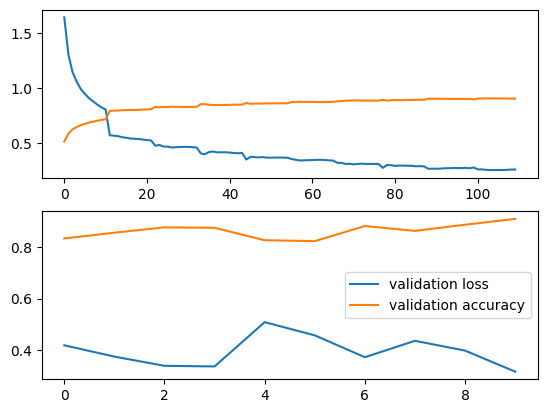

In [ ]:
fig = plt.figure(num = 2)
fig1 = fig.add_subplot(2,1,1)
fig2 = fig.add_subplot(2,1,2)
fig1.plot(total_loss_train, label = 'training loss')
fig1.plot(total_acc_train, label = 'training accuracy')
fig2.plot(total_loss_val, label = 'validation loss')
fig2.plot(total_acc_val, label = 'validation accuracy')
plt.legend()
plt.show()

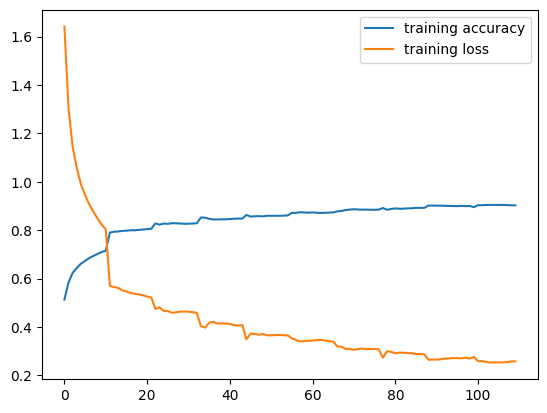

In [ ]:
fig = plt.figure(num=1)
fig1 = fig.add_subplot(1,1,1)
#fig2 = fig.add_subplot(2,1,2)
fig1.plot(total_acc_train, label = 'training accuracy')
fig1.plot(total_loss_train, label = 'training loss')
#fig2.plot(total_loss_val, label = 'validation loss')
#fig2.plot(total_acc_val, label = 'validation accuracy')
plt.legend()
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

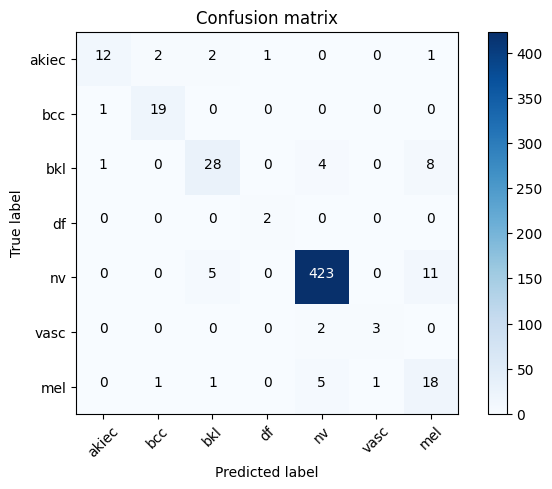

In [ ]:
# Validation data evaluation

model.eval()
y_label = []
y_predict = []
with torch.no_grad():
    for i, data in enumerate(val_loader):
        images, labels = data
        N = images.size(0)
        images = Variable(images).to(device)
        outputs = model(images)
        prediction = outputs.max(1, keepdim=True)[1]
        y_label.extend(labels.cpu().numpy())
        y_predict.extend(np.squeeze(prediction.cpu().numpy().T))

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_label, y_predict)
# plot the confusion matrix
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc','mel']
plot_confusion_matrix(confusion_mtx, plot_labels)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


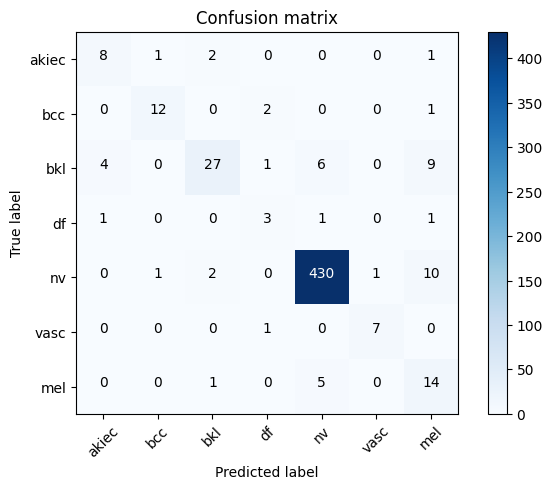

In [ ]:
# Test data evaluation

model.eval()
test_y_label = []
test_y_predict = []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        images, labels = data
        N = images.size(0)
        images = Variable(images).to(device)
        outputs = model(images)
        prediction = outputs.max(1, keepdim=True)[1]
        test_y_label.extend(labels.cpu().numpy())
        test_y_predict.extend(np.squeeze(prediction.cpu().numpy().T))

# compute the confusion matrix
confusion_mtx_test = confusion_matrix(test_y_label, test_y_predict)
# plot the confusion matrix
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc','mel']
plot_confusion_matrix(confusion_mtx_test, plot_labels)

In [ ]:
# Generate a test classification report
report = classification_report(test_y_label, test_y_predict, target_names=plot_labels)
print(report)


              precision    recall  f1-score   support

       akiec       0.62      0.67      0.64        12
         bcc       0.86      0.80      0.83        15
         bkl       0.84      0.57      0.68        47
          df       0.43      0.50      0.46         6
          nv       0.97      0.97      0.97       444
        vasc       0.88      0.88      0.88         8
         mel       0.39      0.70      0.50        20

    accuracy                           0.91       552
   macro avg       0.71      0.73      0.71       552
weighted avg       0.92      0.91      0.91       552



Text(0, 0.5, 'Fraction classified incorrectly')

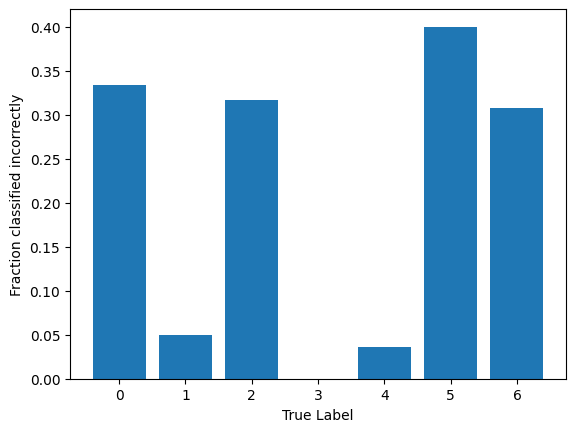

In [ ]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

Text(0, 0.5, 'Fraction classified incorrectly')

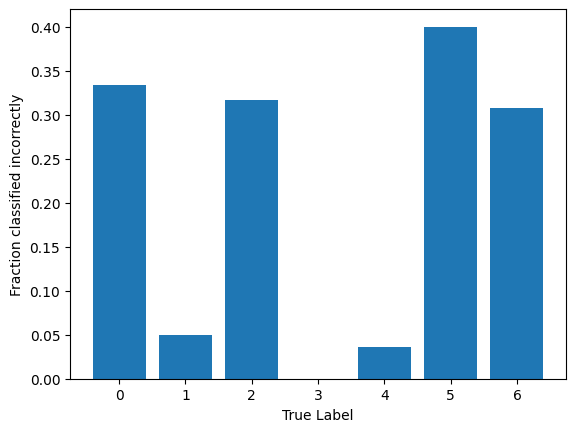

In [ ]:
abel_frac_error = 1 - np.diag(confusion_mtx_test) / np.sum(confusion_mtx_test, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')